In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import shutil
import tensorflow as tf
import PIL.Image as Image
from tensorflow import keras
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications import *
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn import model_selection
from tqdm import tqdm
from tensorflow.keras import optimizers

In [3]:
input_shape=(224,224,3)
conv_base = MobileNet(weights="imagenet", include_top=False, input_shape=input_shape)

17235968/17225924 [==============================] - 6s 0us/step


In [5]:
labels=os.listdir(r'C:\Users\Aditi\Desktop\Projects\Breast Cancer Detection n Prediction\Training')
print(labels)

['benign', 'malignant', 'normal']


In [7]:
all_files=[]
for item in labels:
    files=os.listdir('C:/Users/Aditi/Desktop/Projects/Breast Cancer Detection n Prediction/Training'+'/'+item)
    for i in files:
        all_files.append((item,str(item+'/'+i)))

In [8]:
all_files

[('benign', 'benign/benign (1).png'),
 ('benign', 'benign/benign (1)_mask.png'),
 ('benign', 'benign/benign (10).png'),
 ('benign', 'benign/benign (10)_mask.png'),
 ('benign', 'benign/benign (100).png'),
 ('benign', 'benign/benign (100)_mask.png'),
 ('benign', 'benign/benign (100)_mask_1.png'),
 ('benign', 'benign/benign (101).png'),
 ('benign', 'benign/benign (101)_mask.png'),
 ('benign', 'benign/benign (102).png'),
 ('benign', 'benign/benign (102)_mask.png'),
 ('benign', 'benign/benign (103).png'),
 ('benign', 'benign/benign (103)_mask.png'),
 ('benign', 'benign/benign (104).png'),
 ('benign', 'benign/benign (104)_mask.png'),
 ('benign', 'benign/benign (105).png'),
 ('benign', 'benign/benign (105)_mask.png'),
 ('benign', 'benign/benign (106).png'),
 ('benign', 'benign/benign (106)_mask.png'),
 ('benign', 'benign/benign (107).png'),
 ('benign', 'benign/benign (107)_mask.png'),
 ('benign', 'benign/benign (108).png'),
 ('benign', 'benign/benign (108)_mask.png'),
 ('benign', 'benign/beni

In [9]:
data=pd.DataFrame(data=all_files,columns=['Labels','Image'])

In [10]:
data

,Labels,Image
0,benign,benign/benign (1).png
1,benign,benign/benign (1)_mask.png
2,benign,benign/benign (10).png
3,benign,benign/benign (10)_mask.png
4,benign,benign/benign (100).png
...,...,...
1573,normal,normal/normal (97)_mask.png
1574,normal,normal/normal (98).png
1575,normal,normal/normal (98)_mask.png
1576,normal,normal/normal (99).png


In [14]:
images=[]
label=[]
path='C:/Users/Aditi/Desktop/Projects/Breast Cancer Detection n Prediction/Training'
for i in range(0,len(all_files)):
    filepath=str(path+'/'+all_files[i][1])
    img=(cv2.imread(filepath))
    img=cv2.resize(img,(224,224))
    images.append(img)
    label.append(all_files[i][0])

In [15]:
images=np.array(images)

In [16]:
images.shape

(1578, 224, 224, 3)

In [17]:
y=pd.get_dummies(data.Labels)
print(y)

      benign  malignant  normal
0          1          0       0
1          1          0       0
2          1          0       0
3          1          0       0
4          1          0       0
...      ...        ...     ...
1573       0          0       1
1574       0          0       1
1575       0          0       1
1576       0          0       1
1577       0          0       1

[1578 rows x 3 columns]


# Training

In [22]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))

In [23]:
model.add(layers.Dropout(0.2, name="dropout_out"))

In [24]:
model.add(layers.Dense(3, activation="softmax"))
conv_base.trainable = False

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(images,y,shuffle=True,random_state=42,test_size=0.4)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(946, 224, 224, 3)
(946, 3)
(632, 224, 224, 3)
(632, 3)


In [28]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [29]:
history = model.fit(x_train, y_train, epochs=10, verbose=2)

Epoch 1/10
30/30 - 14s - loss: 1.6785 - acc: 0.5888 - 14s/epoch - 460ms/step
Epoch 2/10
30/30 - 17s - loss: 1.1089 - acc: 0.7114 - 17s/epoch - 561ms/step
Epoch 3/10
30/30 - 17s - loss: 0.9386 - acc: 0.7389 - 17s/epoch - 552ms/step
Epoch 4/10
30/30 - 16s - loss: 0.7326 - acc: 0.7748 - 16s/epoch - 544ms/step
Epoch 5/10
30/30 - 16s - loss: 0.6486 - acc: 0.7907 - 16s/epoch - 545ms/step
Epoch 6/10
30/30 - 17s - loss: 0.6009 - acc: 0.7970 - 17s/epoch - 557ms/step
Epoch 7/10
30/30 - 16s - loss: 0.5997 - acc: 0.8066 - 16s/epoch - 532ms/step
Epoch 8/10
30/30 - 16s - loss: 0.5164 - acc: 0.8277 - 16s/epoch - 543ms/step
Epoch 9/10
30/30 - 17s - loss: 0.5058 - acc: 0.8277 - 17s/epoch - 552ms/step
Epoch 10/10
30/30 - 17s - loss: 0.5122 - acc: 0.8203 - 17s/epoch - 550ms/step


In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

20/20 [==============================] - 9s 434ms/step - loss: 0.5760 - acc: 0.8085


In [31]:
print("Test Loss: ",test_loss)
print("Test Accuracy: ",round(test_acc*100,2),"%")

Test Loss:  0.5759860873222351
Test Accuracy:  80.85 %


# Validation

In [32]:
y_pred=model.predict(x_test)
score=model.evaluate(x_test, y_test,verbose=1)

20/20 [==============================] - 13s 635ms/step - loss: 0.5760 - acc: 0.8085


# Prediction

In [33]:
import easygui
import imageio

In [34]:
name=input("Input patient name  ")

Input patient name  Miss Singhania


In [35]:
print("Submit your image for diagnosis")
flag=0
while(flag==0):    
    ImagePath=easygui.fileopenbox()
    img=cv2.imread(ImagePath)
    if img is None:
            print("Can not find any image. Choose appropriate file")
            continue
    else:
        flag=1

Submit your image for diagnosis


In [36]:
img.shape

(398, 361, 3)

In [37]:
img=cv2.resize(img,(224,224))

In [38]:
img.shape

(224, 224, 3)

In [39]:
img

array([[[  5,   5,   5],
        [  0,   0,   0],
        [  5,   5,   5],
        ...,
        [157, 157, 157],
        [150, 150, 150],
        [ 70,  70,  70]],

       [[  5,   5,   5],
        [ 77,  77,  77],
        [160, 160, 160],
        ...,
        [117, 117, 117],
        [112, 112, 112],
        [ 96,  96,  96]],

       [[ 81,  81,  81],
        [192, 192, 192],
        [ 52,  52,  52],
        ...,
        [115, 115, 115],
        [100, 100, 100],
        [110, 110, 110]],

       ...,

       [[ 18,  18,  18],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 39,  39,  39],
        [ 35,  35,  35],
        [ 33,  33,  33]],

       [[ 13,  13,  13],
        [ 15,  15,  15],
        [ 17,  17,  17],
        ...,
        [ 42,  42,  42],
        [ 45,  45,  45],
        [ 46,  46,  46]],

       [[ 10,  10,  10],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [ 55,  55,  55],
        [ 58,  58,  58],
        [ 63,  63,  63]]

In [42]:
from PIL import Image as im

In [43]:
image=im.fromarray(img)

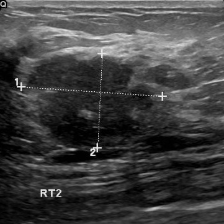

In [44]:
image

In [45]:
img=img[np.newaxis,...]

In [46]:
img.shape

(1, 224, 224, 3)

In [47]:
ans=model.predict(img)

In [48]:
ans

array([[0.37481746, 0.6212166 , 0.00396586]], dtype=float32)

In [49]:
index=np.argmax(ans)

In [50]:
index

1

In [51]:
accuracy=round((np.amax(ans)*100),2)

In [52]:
print("There is a {a}% chance that {n} suffers from {d} tumor".format(a=accuracy, n=name, d=labels[index]))

There is a 62.12% chance that Miss Singhania suffers from malignant
